In [18]:
from sklearn.datasets import load_digits
mnist=load_digits()
X=mnist.data
y=mnist.target

#Convert into binary classifier

yB=y==5

In [23]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,yB,test_size=0.2,random_state=42)

## SGDClassifier Stochastic Gradient Descent it is suited online learning

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
sgd_clf.predict(X_test[-5:])

array([False, False, False, False,  True])

In [29]:
y_test[-5:]

array([False, False, False, False,  True])

## Performance measure
![](pic/im9.png)

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3,random_state=42)

for train_index, test_index in skfolds.split(X_train,y_train):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.9895615866388309
0.9958246346555324
0.9895615866388309


/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left

## Cross validation score

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left

array([0.98956159, 0.99582463, 0.98956159])

In [39]:
from sklearn.base import BaseEstimator
import numpy as num
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return num.zeros((len(X),1),dtype=bool)

In [40]:
never5clf=Never5Classifier()
cross_val_score(never5clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.90605428, 0.90605428, 0.90605428])

![](pic/im10.png)

## Confusion Matrix

cross_val_predict() instead of cross_val_score() gives the prediction in each each test fold

In [42]:
from sklearn.metrics import confusion_matrix
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_train)

/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [43]:
confusion_matrix(y_train,y_pred)

array([[1297,    5],
       [   5,  130]])

### Precision

The confusion matix can be used to measure the accuracy of positive predictions i.e precision

$$precision=\frac{TP}{TP+FP}$$

There is also other measure, which is *recall* or *sensitivity* or *true positive rate (TPR)*

$$recall=\frac{TP}{TP+FN}$$

![](pic/im11.png)

In [46]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train,y_pred)

0.9629629629629629

In [47]:
recall_score(y_train,y_pred)

0.9629629629629629

![](pic/im12.png)

In [49]:
from sklearn.metrics import f1_score
f1_score(y_train,y_pred)

0.9629629629629629

Classifier uses some threshold to classify a data which we can get using decision_function method of the classifier




In [56]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
y_score=cross_val_predict(sgd_clf,X_train,y_train,cv=3,method="decision_function")
precisions,recalls,thresholds=precision_recall_curve(y_train,y_score)

/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left

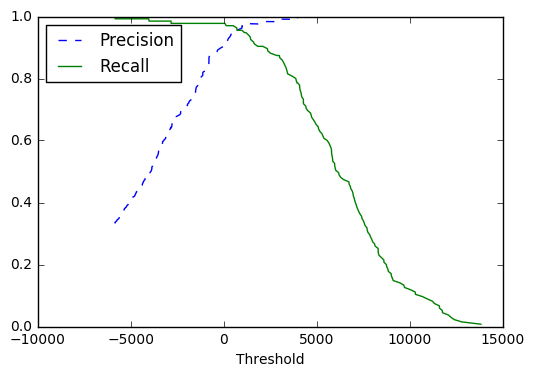

In [57]:
import pylab as lab
def plot_precision_recall_vs_threshold(precision,recalls,thresholds):
    lab.plot(thresholds,precisions[:-1],"b--",label="Precision")
    lab.plot(thresholds,recalls[:-1],"g-",label="Recall")
    lab.xlabel("Threshold")
    lab.legend(loc="upper left")
    #lab.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
lab.show()

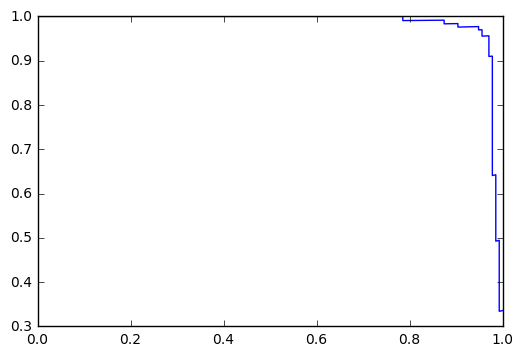

In [58]:
lab.plot(recalls,precisions)
lab.show()

![](pic/im14.png)

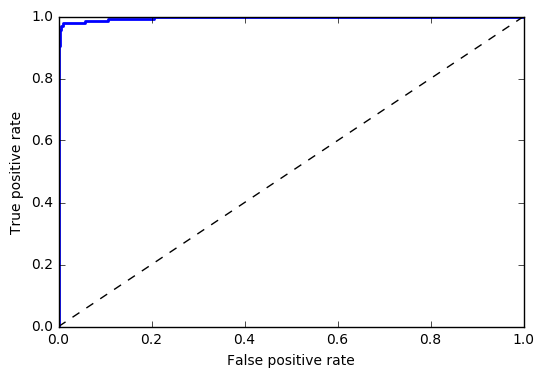

In [60]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_train,y_score)

def plot_roc_curve(fpr,tpr,label=None):
    lab.plot(fpr,tpr,linewidth=2,label=label)
    lab.plot([0,1],[0,1],"k--")
    lab.axis([0,1,0,1])
    lab.xlabel("False positive rate")
    lab.ylabel("True positive rate")
    
plot_roc_curve(fpr,tpr)
lab.show()

![](pic/im15.png)

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_score)

0.9968993571144109

![](pic/im16.png)


# MultiClass classifier

![](pic/im17.png)
![](pic/im18.png)



In [66]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
sgd_clf.fit(X_train,y_train)
print(sgd_clf.predict(X_train[-1:]))
y_train[-1]

[1]


/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


1

In [75]:
scores=sgd_clf.decision_function(X_train[-1:])
print(scores)

[[ -4252.56096868   3112.32477171  -3993.03658014  -9283.80404148
   -4592.4652376   -7566.51428481  -3379.0388801   -7755.77093857
   -6379.36918746 -10988.28267649]]


In [76]:
num.argmax(scores)

1

In [77]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
# to test OneVsONe and OneVsAll

from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict(X_train[-1:])

/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left

array([1])

In [80]:
len(ovo_clf.estimators_)

45

In [83]:
# using random forest
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier()
forest_clf.fit(X_train,y_train)
forest_clf.predict(X_train[1:3])

/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 0])

In [84]:
forest_clf.predict_proba(X_train[1:3])

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1]])

## Errror anaalysis

In [87]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X_train.astype(num.float64))

y_train_pred=cross_val_predict(sgd_clf,X_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left

array([[142,   0,   0,   0,   1,   1,   1,   0,   0,   0],
       [  0, 142,   0,   1,   0,   0,   2,   0,   4,   5],
       [  0,   2, 138,   2,   1,   0,   0,   1,   0,   0],
       [  0,   0,   2, 135,   0,   4,   0,   2,   4,   2],
       [  0,   1,   0,   0, 128,   0,   0,   2,   3,   1],
       [  0,   0,   0,   0,   0, 131,   0,   2,   0,   2],
       [  0,   2,   0,   0,   0,   0, 140,   0,   4,   0],
       [  0,   0,   0,   0,   2,   0,   0, 142,   1,   0],
       [  0,   7,   1,   2,   1,   0,   0,   1, 132,   0],
       [  0,   1,   0,   1,   0,   3,   0,   2,   4, 129]])

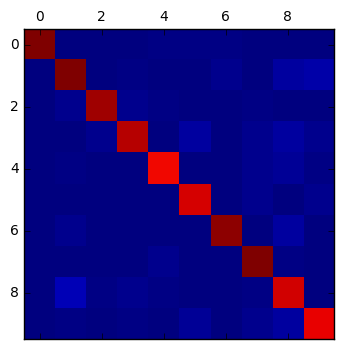

In [88]:
## Make the plot for good visualization

lab.matshow(conf_mx,cmap=lab.cm.jet)
lab.show()

In [89]:
# lets plot error

row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

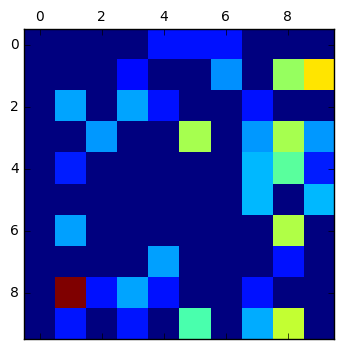

In [90]:
num.fill_diagonal(norm_conf_mx,0)
lab.matshow(norm_conf_mx,cmap=lab.cm.jet)
lab.show()

### MultiLabel Classificaion

It has more than one taret varibales

it is different than multi class 

In [91]:
# lets make two labals 1. odd number 2. greater than 6

yTrainG6=(y_train>6)
yTOdd=(y_train%2==1)
y_multilabel=num.c_[yTrainG6,yTOdd]

from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
knn_clf.predict(X_train[:3])

array([[False, False],
       [False, False],
       [False, False]])

In [94]:
y_multilabel[:3]

array([[False, False],
       [False, False],
       [False, False]])

In [97]:
# F_1 score

y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_train,cv=3)
f1_score(y_train,y_train_knn_pred,average="weighted")

0.9804825388872301

![](pic/im19.png)

## Exercise

In [105]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier()
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [ca

In [116]:
from sklearn.model_selection import GridSearchCV
grid={'n_neighbors':[5,7,9,11],
     'weights':['uniform','distance']}

grid_search=GridSearchCV(knn,grid,cv=3,\
                         scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

/Users/manu_hem/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 7, 9, 11], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [119]:
best_knn=grid_search.best_estimator_

In [120]:
y_train_pred=cross_val_predict(best_knn,X_train,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[145,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 154,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1, 142,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 145,   0,   1,   0,   2,   1,   0],
       [  0,   0,   0,   0, 132,   0,   0,   2,   1,   0],
       [  0,   0,   0,   0,   0, 132,   0,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0, 145,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 145,   0,   0],
       [  0,   5,   1,   2,   0,   0,   0,   1, 135,   0],
       [  0,   1,   0,   1,   0,   1,   0,   0,   1, 136]])

In [123]:
tptn=sum(num.diag(conf_mx))

In [129]:
total=sum(sum(conf_mx))

In [130]:
accuracy=tptn/total
print(accuracy)

0.9819067501739736


In [131]:
# test for test set
y_test_pred=cross_val_predict(best_knn,X_test,y_test,cv=3)
conf_mx=confusion_matrix(y_test,y_test_pred)
tptn=sum(num.diag(conf_mx))
total=sum(sum(conf_mx))
accuracy=tptn/total
print(accuracy)

0.9416666666666667
